In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns #for plotting

import dame_flame
import random
np.random.seed(1) #ensure reproducibility


pd.options.mode.chained_assignment = None

In [2]:
# Data on Ridership, where total_boardings is the number of boardings of a specific card_id on King County Metro.

In [20]:
clean_ridership_path = "/Users/JennyH/cisil-causal-inference/Data/flame_boardings.csv"
df_clean_ridership = pd.read_csv(clean_ridership_path)
df_clean_ridership = df_clean_ridership.iloc[:,1:]
df_clean_ridership


,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
0,0,4,3,1,1,2,0,0,0,2,3,1.0
1,0,4,3,1,1,2,0,0,0,3,4,14.0
2,0,4,3,1,1,2,0,0,0,2,4,0.0
3,3,4,3,1,1,2,0,0,2,2,2,0.0
4,2,4,3,1,1,2,0,0,0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13543,1,2,2,1,1,3,0,1,0,1,3,0.0
13544,5,1,2,1,1,3,0,1,0,1,3,0.0
13545,0,1,2,1,1,3,0,1,0,1,0,0.0
13546,0,1,2,2,3,3,1,2,0,1,0,0.0


In [21]:
df_clean_ridership.query("Access30Transit_D == 4")

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
5,1,1,2,4,4,3,1,0,0,2,3,807.0
6,1,1,2,4,4,3,1,0,0,1,5,0.0
7,1,1,2,4,4,3,1,0,0,1,5,110.0
8,1,1,2,4,4,3,1,0,0,2,5,0.0
9,1,1,2,4,4,3,1,0,0,2,5,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13517,4,3,3,4,3,2,0,0,0,1,1,0.0
13518,0,1,3,4,4,3,0,1,0,1,2,0.0
13524,0,1,4,4,4,4,0,0,0,1,4,0.0
13532,1,3,2,4,3,2,1,2,0,1,4,0.0


## Run FLAME for matching.

In [22]:
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontree', 
                                            want_pe=True)

In [23]:
model_flame_AMT.fit(holdout_data=False, 
                    treatment_column_name='SAP', 
                    outcome_column_name='total_boardings')

result_flame_AMT = model_flame_AMT.predict(df_clean_ridership)

Iteration number:  1
	Number of matched groups formed in total:  459
	Unmatched treated units:  3912 out of a total of  4973 treated units
	Unmatched control units:  7601 out of a total of  8575 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2035
	Number of matches made so far:  2035
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  527
	Unmatched treated units:  3809 out of a total of  4973 treated units
	Unmatched control units:  7523 out of a total of  8575 control units
	Predictive error of covariates chosen this iteration:  7317.84439825263
	Number of matches made in this iteration:  181
	Number of matches made so far:  2216
	In this iteration, the covariates dropped are:  Access30Transit_ts_D
Iteration number:  3
	Number of matched groups formed in total:  658
	Unmatched treated units:  3642 out of a total of  4973 treated units
	Unmatched con

<ipython-input-18-4a901d3a82e5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


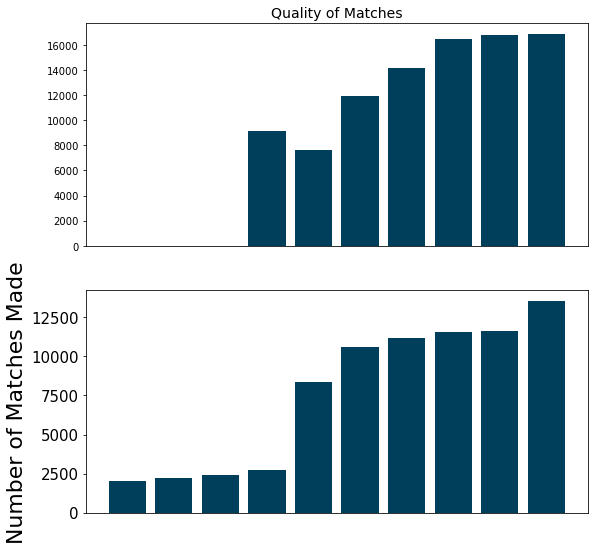

In [18]:
# Figure Visualzing Qualit of Matches (i.e. Match Group Size vs. Covariates Matched on.)
x = ["NONE", "Access30Transit_ts", '+Language', '+lowwagelaborforce', '+Agency', '+Age_bin', '+OverallJobAccess', '+Access30Transit', '+spatialmismatch', 'stage']
y1 = [0, 0, 0, 9130, 7614, 11950, 14126, 16455, 16815, 16854] # some of these will be repeat matches already made earlier iterations.
y2 = [2035, 2216, 2412, 2749, 8372, 10630, 11201, 11579, 11619, 13548]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
# ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)


In [24]:
matched = model_flame_AMT.df_units_and_covars_matched
matched # covariates dropped according to predicting total_boardings

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Agency,Language,stage,Age_bin
0,0,*,3,*,*,2,*,*,2,3
1,0,*,*,*,*,*,*,*,3,*
2,0,*,3,*,*,2,*,*,2,4
3,3,*,3,*,*,2,*,*,2,2
4,2,*,3,*,*,2,*,*,1,2
...,...,...,...,...,...,...,...,...,...,...
13543,1,*,2,*,*,3,*,*,1,3
13544,5,*,*,*,*,*,*,*,1,3
13545,0,*,2,*,*,3,*,*,1,0
13546,0,*,2,*,*,3,*,*,1,0


In [25]:
# ATE Estimate
ate_ridership = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_ridership

42.63089840325858

## Create Scatterplots of Matched Groups.

In [26]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = df_clean_ridership.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [27]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out   

In [29]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

Text(0, 0.5, 'CATE')

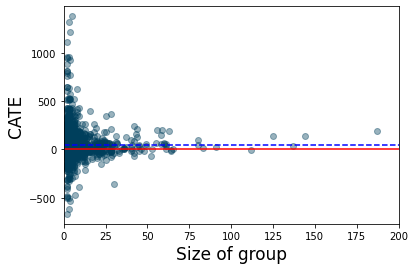

In [30]:
# Scatter Plot for CATE
cors = {True:"green", False:"green"}
 #hisp = pd.Series(in_hisp)

plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=ate_ridership, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter.pdf', bbox_inches="tight")

### Conditional Average Treatment Effects By Race, Access to Transit

In [31]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)



In [32]:
## Conf. Interval for Asian CATE estimates
cate_lst = create_cate_lst(size_asian, cate_asian)
mean_cate_asian = sum(cate_lst)/len(cate_lst)
mean_cate_asian

112.13338772112475

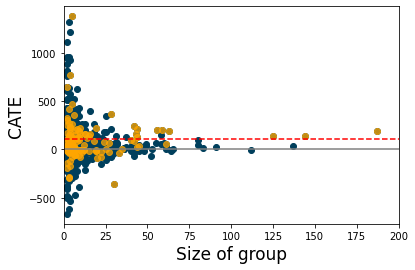

In [34]:
# Scatter Plots displaying the CATEs for matched groups with Asian individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=mean_cate_asian, color='red', linestyle='--')

plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_ridership.pdf', bbox_inches="tight")

In [35]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
# Hispanic
(size, cate_all, in_hisp, size_hispanic, cate_hispanic) = create_df_scatter("RaceDesc", 3)


In [36]:
## mean cate hispanic race
cate_hispanic_lst = create_cate_lst(size_hispanic, cate_hispanic)
mean_cate_h = sum(cate_hispanic_lst)/len(cate_hispanic_lst)
mean_cate_h

-50.81033983494799

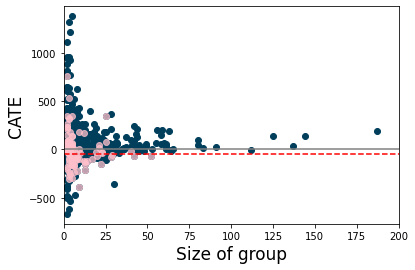

In [38]:
# Scatter plot Hispanic Individuals.

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_hispanic, cate_hispanic, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_cate_h, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('hispanic_ridership.pdf', bbox_inches="tight")

In [39]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
# White
(size, cate_all, in_hisp, size_white, cate_white) = create_df_scatter("RaceDesc", 0)


In [40]:
## mean cate white race
cate_w_lst = create_cate_lst(size_white, cate_white)
mean_cate_w = sum(cate_w_lst)/len(cate_w_lst)
mean_cate_w

33.52429386890515

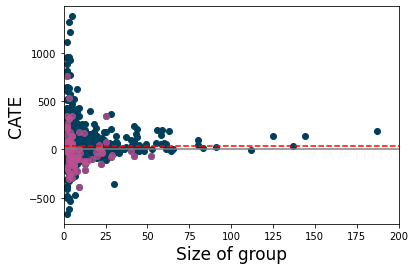

In [41]:
# Scatter plot Hispanic Individuals.

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_hispanic, cate_hispanic, c = "#bc5090", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_cate_w, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('white_ridership.pdf', bbox_inches="tight")

### Overall Job Access

In [51]:
(size, cate_all, in_access_one, size_access_one, cate_access_one) = create_df_scatter("OverallJobAccess_D", 1)



In [52]:
## mean cate lowest access to transit
cate_transit1_lst = create_cate_lst(size_access_one, cate_access_one)
mean_transit1_cate = sum(cate_transit1_lst)/len(cate_transit1_lst)
mean_transit1_cate

7.674025910854294

In [71]:
matplotlib.rcParams.update({'font.size': 14})

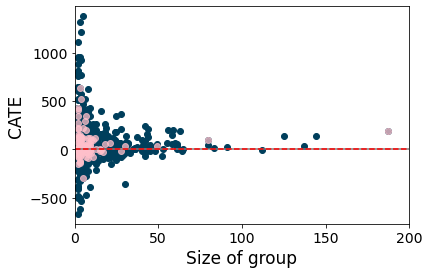

In [73]:
# Scatter plot ("Access30Transit_D", 1) people with Bottom 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_one, cate_access_one, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_transit1_cate, color='red', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

plt.savefig('job_bottom_ridership.pdf', bbox_inches="tight")

In [57]:
(size, cate_all, in_access_four, size_access_four, cate_access_four) = create_df_scatter("OverallJobAccess_D", 3)



In [58]:
## mean cate highest access to transit
cate_transit4_lst = create_cate_lst(size_access_four, cate_access_four)
mean_transit4_cate = sum(cate_transit4_lst)/len(cate_transit4_lst)
mean_transit4_cate

54.541863477873726

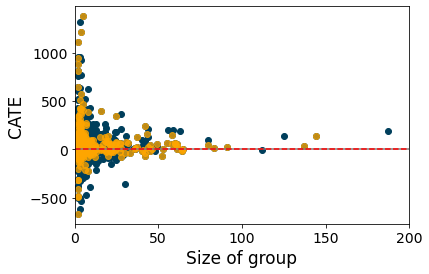

In [74]:
# Scatter plot ("Access30Transit_D", 1) people with Top 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_four, cate_access_four, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_transit1_cate, color='red', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

plt.savefig('job_top_ridership.pdf', bbox_inches="tight")